In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
ct= pd.read_csv('Fino Dataset- Aayush - CT (1).csv')
meta=pd.read_csv('Fino Dataset- Aayush - meta.csv')
whatsapp=pd.read_csv('Fino Dataset- Aayush - whatsapp.csv')

In [4]:
ct.head()

,SI number,Product,Campaign Owner,Platform,Date,Campaign Name,Target Audience,Sent,Engaged (Notification Viewed),Rate,Status,Business Impact
0,1,Shopkeepers Policy,Shriya,CT (Mitra),"Nov 30, 10:40 AM",VR:Shopkeeper_Policy,NaN,"28,974",4,0.01,Completed,NaN
1,2,FinoPay,Shriya,CT (Mitra),"Nov 23, 2:00 PM",AB1:Upi _Txn,NaN,"2,441,265",121,0%,Completed,NaN
2,3,Become a Merchant,Shriya,CT (Mitra),"Nov 21, 6:00 PM",AB1:Become_a_Merchant_No_Cif_Have_Token,NaN,"1,244,607","1,017",0.08,Completed,NaN
3,4,Shopkeepers Policy,Shriya,CT (Mitra),"Nov 21, 12:37 PM",VR:Shopkeeper_Policy,NaN,"28,836",16,0.06,Completed,NaN
4,5,Suvidha Account,Shriya,CT (Mitra),"Nov 21, 12:00 AM",HM:suvidha_Merchant_notifcation__Nov'23 (21st ...,NaN,"302,571",154,0.05,Awaiting Next Run,NaN


In [5]:
ct =ct.drop(['SI number','Campaign Owner', 'Business Impact'], axis=1)

In [6]:
ct.head()

,Product,Platform,Date,Campaign Name,Target Audience,Sent,Engaged (Notification Viewed),Rate,Status
0,Shopkeepers Policy,CT (Mitra),"Nov 30, 10:40 AM",VR:Shopkeeper_Policy,NaN,"28,974",4,0.01,Completed
1,FinoPay,CT (Mitra),"Nov 23, 2:00 PM",AB1:Upi _Txn,NaN,"2,441,265",121,0%,Completed
2,Become a Merchant,CT (Mitra),"Nov 21, 6:00 PM",AB1:Become_a_Merchant_No_Cif_Have_Token,NaN,"1,244,607","1,017",0.08,Completed
3,Shopkeepers Policy,CT (Mitra),"Nov 21, 12:37 PM",VR:Shopkeeper_Policy,NaN,"28,836",16,0.06,Completed
4,Suvidha Account,CT (Mitra),"Nov 21, 12:00 AM",HM:suvidha_Merchant_notifcation__Nov'23 (21st ...,NaN,"302,571",154,0.05,Awaiting Next Run


3 platforms - Mitra, FinoPay, FinoMitra
48 unique products

In [7]:
ct['Sent'] = pd.to_numeric(ct['Sent'].str.replace(',', ''), errors='coerce')
ct['Engaged (Notification Viewed)'] = pd.to_numeric(ct['Engaged (Notification Viewed)'].str.replace(',', ''), errors='coerce')
ct['Rate'] = pd.to_numeric(ct['Rate'], errors='coerce')

In [8]:
top_5_engaged = ct.nlargest(5, 'Engaged (Notification Viewed)')
print(top_5_engaged)


                    Product      Platform              Date  \
35      Balance Buildup MAB  CT (FinoPay)   Dec 11, 3:25 PM   
143  Makar Sankranti Wishes  CT (FinoPay)  Jan 15, 10:00 AM   
79                 Krazybee  CT (FinoPay)   Dec 19, 4:00 PM   
137                Krazybee  CT (FinoPay)  Jan 18, 12:12 PM   
15                 Krazybee  CT (FinoPay)  Nov 22, 11:00 AM   

                                         Campaign Name    Target Audience  \
35                                  AM:Balance_Buildup          Customers   
143  AB1:Makar_Sankranti_Wishes\r\n\r\nSM\r\n ID: 1...  All FinoPay Users   
79                                         PL:Krazybee          Customers   
137  PL:KrazyBee\r\n\r\nSM\r\n ID: 1705560150 \r\nC...     Loan customers   
15                                         PL:Krazybee                NaN   

        Sent  Engaged (Notification Viewed)  Rate             Status  
35   6399027                         235418  3.68  Awaiting Next Run  
143   962149    

FinoPay has the highest reach

In [9]:
print(ct['Rate'].mean())
print(ct['Engaged (Notification Viewed)'].mean())

1.737017543859649
3600.141891891892


In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # Set the precision you desire

ct.describe()

,Sent,Engaged (Notification Viewed),Rate
count,148.000,148.000,114.000
mean,289047.034,3600.142,1.737
std,849852.258,20828.827,5.079
min,7.000,0.000,0.010
25%,608.500,1.000,0.050
50%,14971.500,9.500,0.160
75%,144589.500,144.000,1.255
max,6399027.000,235418.000,40.220


customers are only on FinoPay and merchants are on Fino Mitra
FinoPay Includes - Customers and All FinoPay Users , C19

In [11]:
ctmitra = ct[ct['Platform'] == 'CT (Mitra)']
ctmitra['Rate'] = ctmitra['Rate'].fillna(0)

ctmitra.head()
ctmitra =ctmitra.drop(['Target Audience'],axis=1)

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_28742/1696461577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctmitra['Rate'] = ctmitra['Rate'].fillna(0)


In [12]:
ctmitra.head()


,Product,Platform,Date,Campaign Name,Sent,Engaged (Notification Viewed),Rate,Status
0,Shopkeepers Policy,CT (Mitra),"Nov 30, 10:40 AM",VR:Shopkeeper_Policy,28974,4,0.010,Completed
1,FinoPay,CT (Mitra),"Nov 23, 2:00 PM",AB1:Upi _Txn,2441265,121,0.000,Completed
2,Become a Merchant,CT (Mitra),"Nov 21, 6:00 PM",AB1:Become_a_Merchant_No_Cif_Have_Token,1244607,1017,0.080,Completed
3,Shopkeepers Policy,CT (Mitra),"Nov 21, 12:37 PM",VR:Shopkeeper_Policy,28836,16,0.060,Completed
4,Suvidha Account,CT (Mitra),"Nov 21, 12:00 AM",HM:suvidha_Merchant_notifcation__Nov'23 (21st ...,302571,154,0.050,Awaiting Next Run


In [13]:
ct['Rate'] = ct['Rate'].fillna(0)


In [14]:
ctmitra['Date'] = pd.to_datetime(ctmitra['Date'], format='%b %d, %I:%M %p')

ctmitra['Time'] = ctmitra['Date'].dt.time

# Print the DataFrame to see the changes
print(ctmitra)

                                    Product    Platform                Date  \
0                        Shopkeepers Policy  CT (Mitra) 1900-11-30 10:40:00   
1                                   FinoPay  CT (Mitra) 1900-11-23 14:00:00   
2                         Become a Merchant  CT (Mitra) 1900-11-21 18:00:00   
3                        Shopkeepers Policy  CT (Mitra) 1900-11-21 12:37:00   
4                           Suvidha Account  CT (Mitra) 1900-11-21 00:00:00   
5   Pradhan Mantri Jeevan Jyoti Bima Yojana  CT (Mitra) 1900-11-20 13:09:00   
6                           Go Digit Health  CT (Mitra) 1900-11-20 10:52:00   
7                                   FinoPay  CT (Mitra) 1900-11-17 14:00:00   
8                           Suvidha Account  CT (Mitra) 1900-11-15 00:00:00   
9               Kisaan Samman Nidhi Yojana   CT (Mitra) 1900-11-14 20:00:00   
10                          Suvidha Account  CT (Mitra) 1900-11-06 14:00:00   

                                        Campaign Na

In [15]:
print(ctmitra['Sent'].median())
print(ctmitra['Rate'].mean())
print(ctmitra['Engaged (Notification Viewed)'].max())
print(ctmitra['Rate'].max())



303917.0
0.055454545454545465
1176
0.15


On Mitra App average 30k users are sent notifications but Engagement Rate is only 0.05 

NOW WORKING ON FINO MITRA APP

In [16]:
ctfm= ct[ct['Platform']=='CT (Fino Mitra)']
ctfm.head()

,Product,Platform,Date,Campaign Name,Target Audience,Sent,Engaged (Notification Viewed),Rate,Status
23,CASA Cashback Offer,CT (Fino Mitra),"Dec 1, 5:45 PM",RS:CASA_Cashback_Offer,Merchant,43250,0,0.000,Running
24,Do Pe Tees,CT (Fino Mitra),"Dec 1, 5:52 PM",RS:Do_Pe_Tees,Merchant,604445,0,0.000,Running
25,MATM AMC,CT (Fino Mitra),"Dec 1, 6:03 PM",RS:MATM_AMC,Merchant,411457,0,0.000,Running
26,AePS Winback,CT (Fino Mitra),"Dec 2, 10:00 AM",RS:AePS_Winback,Merchant,47277,0,0.000,Running
27,Shubh Savings Account Offer,CT (Fino Mitra),"Dec 2, 5:46 PM",RS:Shubh_Savings_AC_Offer,Merchant,472265,0,0.000,Running


In [17]:
ctfm.count()


Product                          79
Platform                         79
Date                             79
Campaign Name                    79
Target Audience                  79
Sent                             79
Engaged (Notification Viewed)    79
Rate                             79
Status                           79
dtype: int64

In [18]:
ctfm['Date'] = pd.to_datetime(ctfm['Date'], format='%b %d, %I:%M %p')

ctfm['Time'] = ctfm['Date'].dt.time


/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_28742/3610521102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctfm['Date'] = pd.to_datetime(ctfm['Date'], format='%b %d, %I:%M %p')
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_28742/3610521102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctfm['Time'] = ctfm['Date'].dt.time


In [19]:
ctfm.head()

,Product,Platform,Date,Campaign Name,Target Audience,Sent,Engaged (Notification Viewed),Rate,Status,Time
23,CASA Cashback Offer,CT (Fino Mitra),1900-12-01 17:45:00,RS:CASA_Cashback_Offer,Merchant,43250,0,0.000,Running,17:45:00
24,Do Pe Tees,CT (Fino Mitra),1900-12-01 17:52:00,RS:Do_Pe_Tees,Merchant,604445,0,0.000,Running,17:52:00
25,MATM AMC,CT (Fino Mitra),1900-12-01 18:03:00,RS:MATM_AMC,Merchant,411457,0,0.000,Running,18:03:00
26,AePS Winback,CT (Fino Mitra),1900-12-02 10:00:00,RS:AePS_Winback,Merchant,47277,0,0.000,Running,10:00:00
27,Shubh Savings Account Offer,CT (Fino Mitra),1900-12-02 17:46:00,RS:Shubh_Savings_AC_Offer,Merchant,472265,0,0.000,Running,17:46:00


In [20]:
zero_count = (ctfm['Engaged (Notification Viewed)'] == 0).sum()

print("Number of zeros in 'Engaged':", zero_count)
zero_count_df = ctfm[ctfm['Engaged (Notification Viewed)'] == 0]


Number of zeros in 'Engaged': 26


Out of 79 Sent, 26 recieved "0" Enagagement.

In [21]:
print(ctfm["Time"])

23     17:45:00
24     17:52:00
25     18:03:00
26     10:00:00
27     17:46:00
         ...   
119    10:03:00
120    10:03:00
121    10:03:00
122    10:03:00
123    10:03:00
Name: Time, Length: 79, dtype: object


In [22]:
zero_count_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 23 to 122
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Product                        26 non-null     object        
 1   Platform                       26 non-null     object        
 2   Date                           26 non-null     datetime64[ns]
 3   Campaign Name                  26 non-null     object        
 4   Target Audience                26 non-null     object        
 5   Sent                           26 non-null     int64         
 6   Engaged (Notification Viewed)  26 non-null     int64         
 7   Rate                           26 non-null     float64       
 8   Status                         26 non-null     object        
 9   Time                           26 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 2.2+ KB


/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_28742/74723953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_count_df['Time'] = pd.to_datetime(zero_count_df['Time'], format='%H:%M:%S')


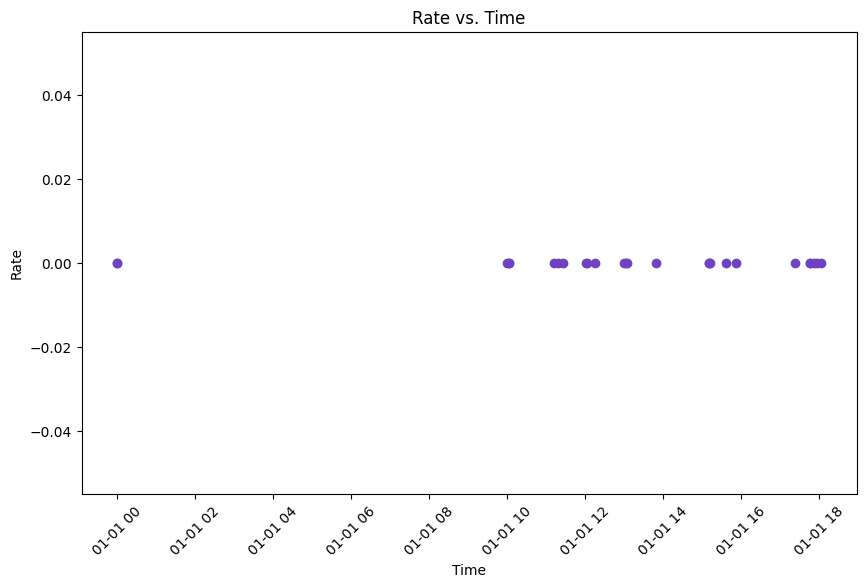

In [23]:

zero_count_df['Time'] = pd.to_datetime(zero_count_df['Time'], format='%H:%M:%S')
company_colors = ['#6610f2', '#6f42c1', '#e83e8c'] 

# Plotting Rate vs. Time
plt.figure(figsize=(10, 6))
plt.scatter(zero_count_df['Time'], zero_count_df['Rate'], marker='o', linestyle='-', color= company_colors[1])
plt.title('Rate vs. Time')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.show()


/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_28742/325273019.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_count_df['Time'] = pd.to_datetime(zero_count_df['Time'], format='%H:%M:%S')


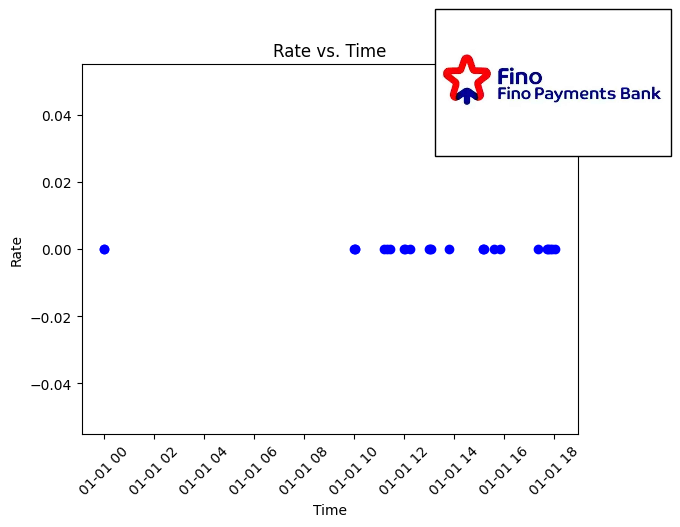

In [24]:
import pandas as pd
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt

logo_path = '/Users/aayushjain/codes/project/Fino/Fino.jpg'

company_colors = ['#6610f2', '#6f42c1', '#e83e8c'] 

if 'Time' in zero_count_df.columns:
    zero_count_df['Time'] = pd.to_datetime(zero_count_df['Time'], format='%H:%M:%S')
else:
    print("Column 'Time' not found in zero_count_df DataFrame.")


logo_img = plt.imread(logo_path)

fig, ax = plt.subplots()

# Scatter plot
ax.scatter(zero_count_df['Time'], zero_count_df['Rate'], marker='o', linestyle='-', color='b')
ax.set_title('Rate vs. Time')
ax.set_xlabel('Time')
ax.set_ylabel('Rate')
ax.tick_params(axis='x', rotation=45)

# Annotate the logo
imagebox = OffsetImage(logo_img, zoom=0.1)
ab = AnnotationBbox(imagebox, (0.95, 0.95), xycoords='axes fraction', boxcoords='axes fraction', pad=0.5)
ax.add_artist(ab)

plt.show()


In [25]:
zero_count_df.info()
#print(zero_count_df['Hour'])


<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 23 to 122
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Product                        26 non-null     object        
 1   Platform                       26 non-null     object        
 2   Date                           26 non-null     datetime64[ns]
 3   Campaign Name                  26 non-null     object        
 4   Target Audience                26 non-null     object        
 5   Sent                           26 non-null     int64         
 6   Engaged (Notification Viewed)  26 non-null     int64         
 7   Rate                           26 non-null     float64       
 8   Status                         26 non-null     object        
 9   Time                           26 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 2.2+ KB


In [26]:
data = zero_count_df['Hour'].value_counts().sort_index()

logo_img = plt.imread(logo_path)

fig, ax = plt.subplots()

plt.bar(data.index, data.values, color=company_colors[0])
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Count of Each Hour')
imagebox = OffsetImage(logo_img, zoom=0.1)
ab = AnnotationBbox(imagebox, (0.95, 0.95), xycoords='axes fraction', boxcoords='axes fraction', pad=0.5)
ax.add_artist(ab)

plt.show()


KeyError: 'Hour'

In [27]:
if 'Time' in ctfm.columns:
    ctfm['Time'] = pd.to_datetime(ctfm['Time'], format='%H:%M:%S')
else:
    print("Column 'Time' not found in ctfm DataFrame.")
ctfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 23 to 123
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Product                        79 non-null     object        
 1   Platform                       79 non-null     object        
 2   Date                           79 non-null     datetime64[ns]
 3   Campaign Name                  79 non-null     object        
 4   Target Audience                79 non-null     object        
 5   Sent                           79 non-null     int64         
 6   Engaged (Notification Viewed)  79 non-null     int64         
 7   Rate                           79 non-null     float64       
 8   Status                         79 non-null     object        
 9   Time                           79 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(5)
memory usage: 6.8+ KB


/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_28742/2267077266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctfm['Time'] = pd.to_datetime(ctfm['Time'], format='%H:%M:%S')


In [28]:
ctfm['Hour'] = ctfm['Time'].dt.hour


/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_28742/1090538125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctfm['Hour'] = ctfm['Time'].dt.hour


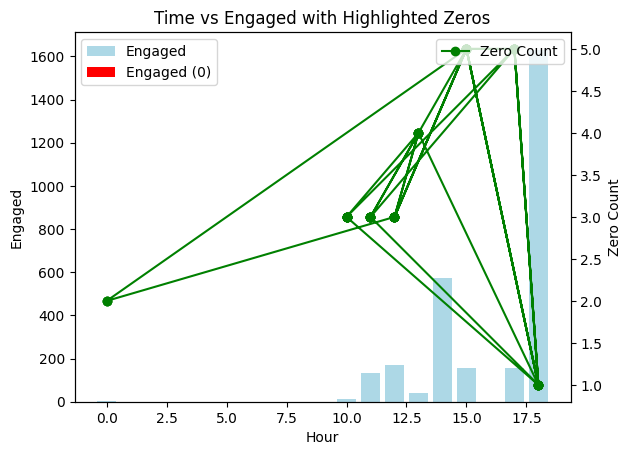

In [29]:
engaged_count = ctfm[ctfm['Engaged (Notification Viewed)'] == 0].groupby('Hour').size().reset_index(name='Zero_Count')

ctfm_merged = pd.merge(ctfm, engaged_count, how='left', on='Hour')

# Plotting the bar graph
fig, ax1 = plt.subplots()

# Plot the total Engaged values
ax1.bar(ctfm_merged['Hour'], ctfm_merged['Engaged (Notification Viewed)'], label='Engaged', color='lightblue')

# Highlight the values where Engaged is 0 with a different color
zero_engaged = ctfm_merged[ctfm_merged['Engaged (Notification Viewed)'] == 0]
ax1.bar(zero_engaged['Hour'], zero_engaged['Engaged (Notification Viewed)'], label='Engaged (0)', color='red')

# Plot the count of 0s at the top of the bars
ax2 = ax1.twinx()
ax2.plot(ctfm_merged['Hour'], ctfm_merged['Zero_Count'], marker='o', color='green', label='Zero Count')

# Adding labels and title
ax1.set_xlabel('Hour')
ax1.set_ylabel('Engaged')
ax2.set_ylabel('Zero Count')
plt.title('Time vs Engaged with Highlighted Zeros')

# Display the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()

In [30]:
engaged_count = ctfm[ctfm['Engaged (Notification Viewed)'] == 0].groupby('Hour').size().reset_index(name='Zero_Count')
print(engaged_count)

engaged_count_nz=ctfm[ctfm['Engaged (Notification Viewed)'] != 0].groupby('Hour').size().reset_index(name='nonzero_Count')
print(engaged_count_nz)

   Hour  Zero_Count
0     0           2
1    10           3
2    11           3
3    12           3
4    13           4
5    15           5
6    17           5
7    18           1
   Hour  nonzero_Count
0     0              1
1    10              8
2    11              5
3    12              6
4    13              2
5    14              2
6    15             14
7    17              8
8    18              7


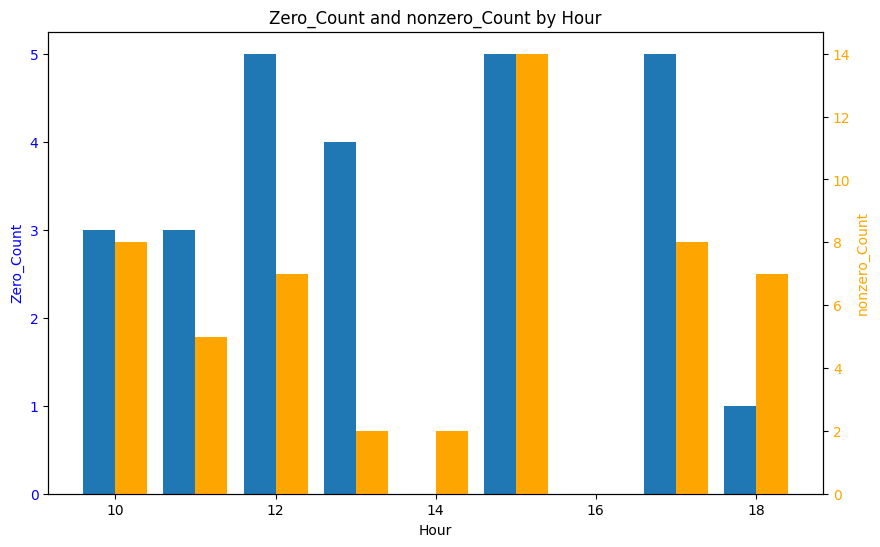

In [31]:
import matplotlib.pyplot as plt
import numpy as np

data_zero_count = {'Hour': [ 10, 11, 12, 13,14, 15, 17, 18],
                   'Zero_Count': [3, 3, 5, 4, 0,5, 5, 1]}

data_nonzero_count = {'Hour': [ 10, 11, 12, 13, 14, 15, 17, 18],
                      'nonzero_Count': [ 8, 5, 7, 2, 2, 14, 8, 7]}

# Create DataFrame from sample data
df_zero_count = pd.DataFrame(data_zero_count)
df_nonzero_count = pd.DataFrame(data_nonzero_count)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting zero_count
ax1.bar(df_nonzero_count['Hour'] - 0.2, df_zero_count['Zero_Count'], width=0.4, label='Zero_Count')

# Plotting nonzero_count
ax2 = ax1.twinx()
ax2.bar(df_nonzero_count['Hour'] + 0.2, df_nonzero_count['nonzero_Count'], width=0.4, label='nonzero_Count', color='orange')

# Formatting
ax1.set_xlabel('Hour')
ax1.set_ylabel('Zero_Count', color='blue')
ax2.set_ylabel('nonzero_Count', color='orange')

ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Zero_Count and nonzero_Count by Hour')
plt.show()


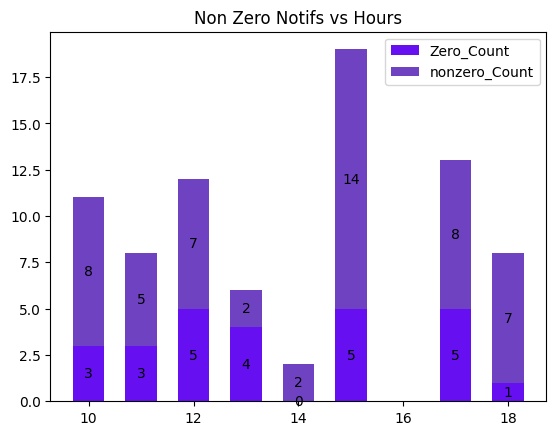

In [32]:

Hour = (10, 11, 12, 13, 14, 15, 17, 18)
final_data = {'Zero_Count': [3, 3, 5, 4, 0, 5, 5, 1],
              'nonzero_Count': [8, 5, 7, 2, 2, 14, 8, 7]}

width = 0.6

fig, ax = plt.subplots()
bottom = np.zeros(8)

for idx, (zc, zc_count) in enumerate(final_data.items()):
    p = ax.bar(Hour, zc_count, width, label=zc, bottom=bottom, color=company_colors[idx])
    bottom += zc_count
    ax.bar_label(p, label_type='center')

ax.set_title('Non Zero Notifs vs Hours')
ax.legend()
plt.show()


10  is when the first notification hits.
15 is where the highest no. of people actually see the notis. Lunch Time probably.
18 too has a good conversion rate.

In [33]:
ctfm['Rate'].describe()

count   79.000
mean     0.052
std      0.072
min      0.000
25%      0.000
50%      0.040
75%      0.070
max      0.390
Name: Rate, dtype: float64

In [34]:
print(ctfm['Sent'].describe())
print(len(ctfm['Sent']))

count        79.000
mean     120315.747
std      322681.066
min         280.000
25%         585.500
50%       14968.000
75%       57096.000
max     2275598.000
Name: Sent, dtype: float64
79


In [35]:

data = ctfm['Sent']

# Define bin edges
bin_edges = [ 20000, 40000, 60000, 80000, 100000, float('inf')]

# Define category labels
category_labels = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5']

# Create bins and add a new column 'Category'
ctfm['Category'] = pd.cut(data, bins=bin_edges, labels=category_labels, right=False)

# Group by 'Category' and calculate the sum
category_sum = ctfm.groupby('Category')['Sent'].sum()
print(category_sum)
'''
# Plot the bar chart
plt.bar(category_sum.index.astype(str), category_sum)
plt.xlabel('Category')
plt.ylabel('Sum of Sent')
plt.title('Distribution of Sent Values in Categories')
plt.show()
'''

Category
cat1     357104
cat2      90527
cat3     200938
cat4          0
cat5    8655210
Name: Sent, dtype: int64


/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_28742/1902968825.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctfm['Category'] = pd.cut(data, bins=bin_edges, labels=category_labels, right=False)


"\n# Plot the bar chart\nplt.bar(category_sum.index.astype(str), category_sum)\nplt.xlabel('Category')\nplt.ylabel('Sum of Sent')\nplt.title('Distribution of Sent Values in Categories')\nplt.show()\n"

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_28742/665014644.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctfm['Category'] = pd.cut(data, bins=bin_edges, labels=False, right=False)


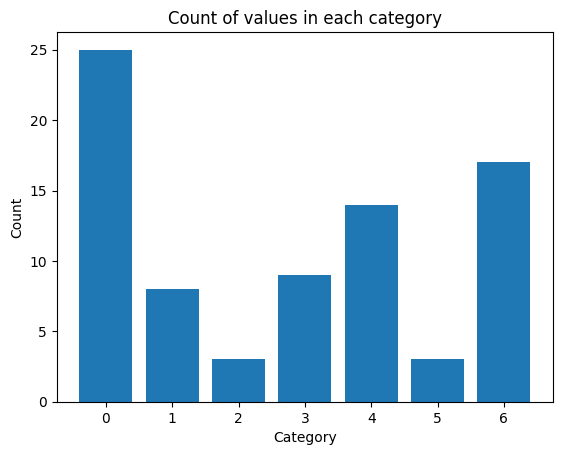

In [36]:
import matplotlib.pyplot as plt

# Assuming 'ctfm' is your DataFrame
data = ctfm['Sent']

# Define bin edges
bin_edges = [0,3500, 5000,10000, 20000, 60000, 100000, float('inf')]

# Create bins and add a new column 'Category'
ctfm['Category'] = pd.cut(data, bins=bin_edges, labels=False, right=False)

# Get the count of values in each category
category_counts = ctfm['Category'].value_counts().sort_index()

# Plot the bar chart
plt.bar(category_counts.index, category_counts.values)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of values in each category')

# Show the plot
plt.show()


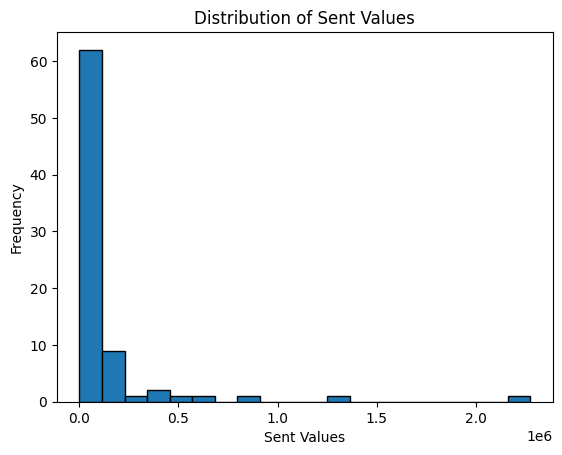

In [37]:
import matplotlib.pyplot as plt

# Assuming 'ctfm' is your DataFrame and 'Sent' is the column
data = ctfm['Sent']

# Plot histogram
plt.hist(data, bins=20, edgecolor='black')  # You can adjust the number of bins as needed

# Add labels and title
plt.xlabel('Sent Values')
plt.ylabel('Frequency')
plt.title('Distribution of Sent Values')

# Show the plot
plt.show()


NOW WORKING ON CT (FINOPAY)

In [38]:
ctfp= ct[ct['Platform']=='CT (FinoPay)']
ctfp.head()

,Product,Platform,Date,Campaign Name,Target Audience,Sent,Engaged (Notification Viewed),Rate,Status
11,Go Digit Health,CT (FinoPay),"Nov 29, 8:00 PM",Digit_Health_Plus_C5_29112023,NaN,266,1,0.380,Completed
12,Go Digit Health,CT (FinoPay),"Nov 29, 8:00 PM",Digit_Health_Plus_C6_291123,NaN,11,0,0.000,Completed
13,Go Digit Health,CT (FinoPay),"Nov 29, 8:00 PM",Digit_Health_Plus_C7_291123,NaN,14,2,14.290,Completed
14,FinoPay,CT (FinoPay),"Nov 23, 12:55 PM",AB1:UPI txn,NaN,1336500,16853,1.260,Completed
15,Krazybee,CT (FinoPay),"Nov 22, 11:00 AM",PL:Krazybee,NaN,2628049,26506,1.010,Completed


In [39]:
ctfp=ctfp.drop(['Platform'],axis=1)

In [40]:
ctfp=ctfp[ctfp["Sent"]>=200]
ctfp.sort_values(by= 'Rate',ascending=False)

,Product,Date,Campaign Name,Target Audience,Sent,Engaged (Notification Viewed),Rate,Status
124,VKYC initiation nudge,"Dec 26, 2:16 PM",AB1:VKYC_Initiation,Customers,616,94,15.260,Running
133,Birthday Wishes,"Jan 24, 12:45 PM",AB1:Birthday_Wishes\r\n\r\nSM\r\n ID: 17060805...,All FinoPay Users,2855,335,11.730,Running
143,Makar Sankranti Wishes,"Jan 15, 10:00 AM",AB1:Makar_Sankranti_Wishes\r\n\r\nSM\r\n ID: 1...,All FinoPay Users,962149,61593,6.400,Completed
142,Lohri Wishes,"Jan 15, 10:09 AM",AB1:Lohri_Wishes\r\n\r\nSM\r\n ID: 1705057114 ...,All FinoPay Users,118998,6335,5.320,Completed
141,Magh Bihu Wishes,"Jan 16, 10:00 AM",AB1:Magh_Bihu_Wishes\r\n\r\nSM\r\n ID: 1705311...,All FinoPay Users,5346,226,4.230,Completed
140,Surya Pongal Wishes,"Jan 16, 10:00 AM",AB1:Surya_Pongal_Wishes\r\n\r\nSM\r\n ID: 1705...,All FinoPay Users,1896,79,4.170,Completed
138,Mattu Pongal Wishes,"Jan 17, 10:00 AM",AB1:Mattu_Pongal_Wishes\r\n\r\nSM\r\n ID: 1705...,All FinoPay Users,1935,79,4.080,Completed
125,App Install Nudge,"Dec 26, 2:52 PM",AB1: App_Install,Customers,69640,2806,4.030,Running
35,Balance Buildup MAB,"Dec 11, 3:25 PM",AM:Balance_Buildup,Customers,6399027,235418,3.680,Awaiting Next Run
17,FinoPay,"Nov 9, 12:00 PM",Step-5_digiSA_2nd Push_revised_21022023,NaN,4140,143,3.450,Completed


In [41]:
ctfp["Target Audience"].unique()

array([nan, 'Customers', 'All FinoPay Users', 'C19',
       'Newly Onboarded Customers', 'Renewal Customers', 'Loan customers',
       'Dropoffs'], dtype=object)

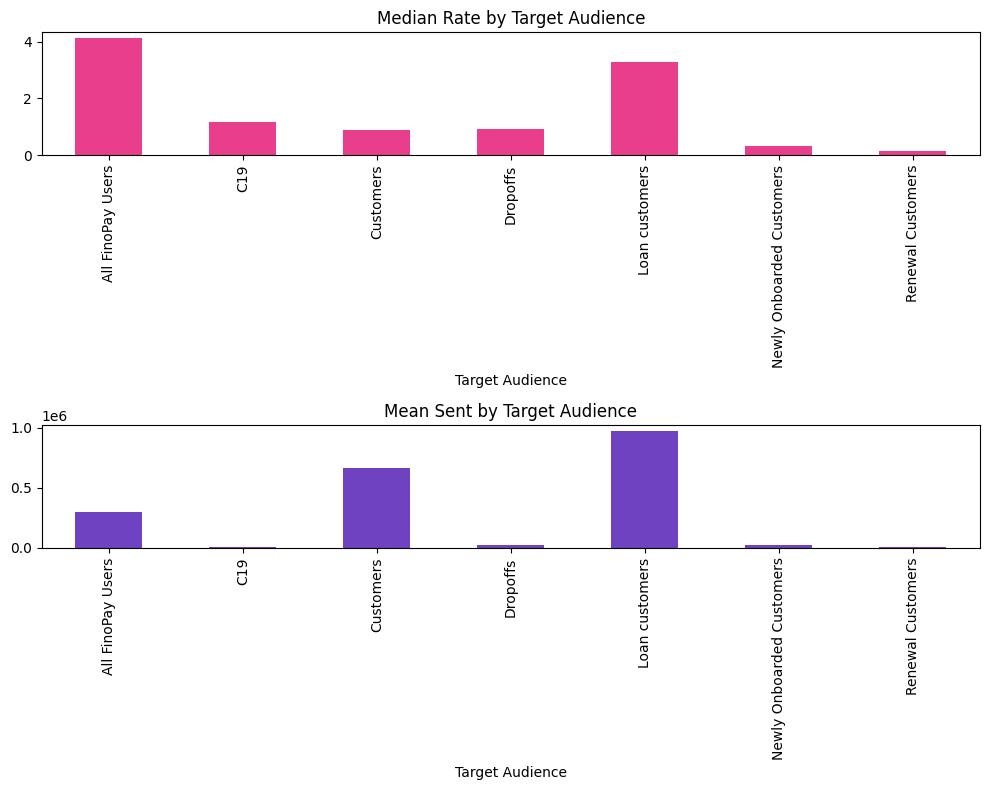

In [42]:
# Assuming 'ctfm' is your DataFrame
grouped_data = ctfp.groupby('Target Audience')

# Calculate median and mean for 'Rate', 'Sent', and 'Engaged'
median_values = grouped_data[['Rate', 'Sent', 'Engaged (Notification Viewed)']].median()
mean_values = grouped_data[['Rate', 'Sent', 'Engaged (Notification Viewed)']].mean()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

median_values['Rate'].plot(kind='bar', ax=axes[0], title='Median Rate by Target Audience',color=company_colors[2])
mean_values['Sent'].plot(kind='bar', ax=axes[1], title='Mean Sent by Target Audience',color=company_colors[1])

plt.tight_layout()
plt.show()

In [43]:
ctfp[ctfp['Target Audience']=='Loan customers'].value_counts().sum()

1

In [44]:
wishes_df=ctfp[ctfp['Campaign Name'].str.contains('Wishes', case=False, na=False)]



In [45]:
wishes_df['Rate'].describe()

count    8.000
mean     5.186
std      2.905
min      2.780
25%      3.755
50%      4.200
75%      5.590
max     11.730
Name: Rate, dtype: float64

In [46]:
wishes_df['Date']

133    Jan 24, 12:45 PM
138    Jan 17, 10:00 AM
140    Jan 16, 10:00 AM
141    Jan 16, 10:00 AM
142    Jan 15, 10:09 AM
143    Jan 15, 10:00 AM
144    Jan 15, 10:00 AM
145    Jan 15, 10:00 AM
Name: Date, dtype: object

In [47]:
ctfp['Date']

11      Nov 29, 8:00 PM
14     Nov 23, 12:55 PM
15     Nov 22, 11:00 AM
16      Nov 17, 4:21 PM
17      Nov 9, 12:00 PM
18       Nov 8, 6:00 PM
19       Nov 8, 6:00 PM
20       Nov 8, 6:00 PM
21       Nov 8, 6:00 PM
22       Nov 8, 4:55 PM
28       Dec 5, 6:00 PM
34      Dec 11, 1:09 PM
35      Dec 11, 3:25 PM
39      Dec 12, 3:24 PM
43     Dec 13, 10:57 AM
55     Dec 15, 11:17 AM
56     Dec 15, 11:18 AM
57      Dec 15, 1:01 PM
58      Dec 15, 3:03 PM
62      Dec 15, 6:00 PM
66     Dec 16, 12:03 PM
73      Dec 18, 4:00 PM
74      Dec 18, 4:00 PM
79      Dec 19, 4:00 PM
84     Dec 21, 12:00 PM
88      Dec 21, 2:00 PM
89      Dec 21, 4:00 PM
90      Dec 21, 6:00 PM
91      Dec 21, 8:04 PM
97     Dec 23, 10:30 AM
124     Dec 26, 2:16 PM
125     Dec 26, 2:52 PM
126     Dec 26, 4:53 PM
128    Dec 27, 11:13 AM
129     Dec 28, 2:40 PM
130    Dec 29, 10:09 AM
131    Dec 30, 10:09 AM
132     Jan 24, 2:36 PM
133    Jan 24, 12:45 PM
134    Jan 24, 10:00 AM
135    Jan 23, 12:00 PM
136    Jan 23, 1

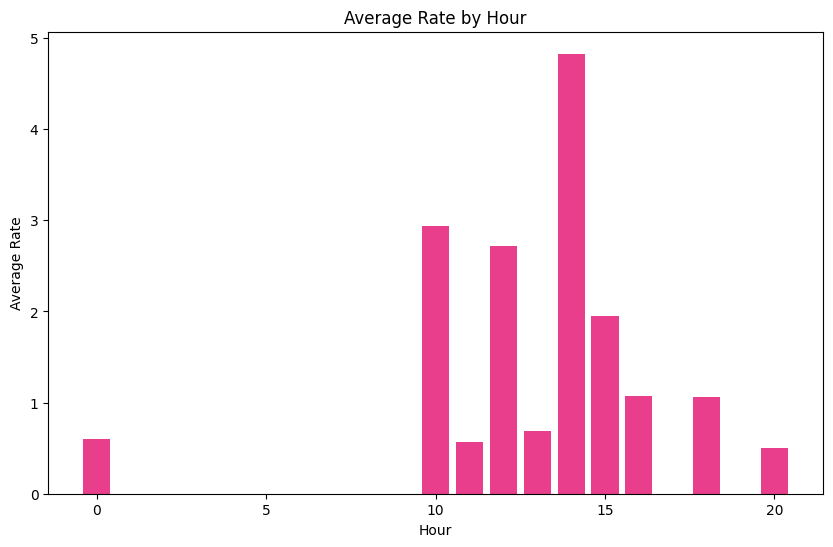

In [48]:


ctfp['Date'] = pd.to_datetime(ctfp['Date'], format='%b %d, %I:%M %p')

# Extract the hour from the 'Date' column
ctfp['Hour'] = ctfp['Date'].dt.hour

# Group by hour and calculate the mean rate for each hour
hourly_rate = ctfp.groupby('Hour')['Rate'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(hourly_rate['Hour'], hourly_rate['Rate'], color=company_colors[2])
plt.title('Average Rate by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rate')
plt.show()



LUNCH TIME ie between 2 -3 pm has the highest viewing rate

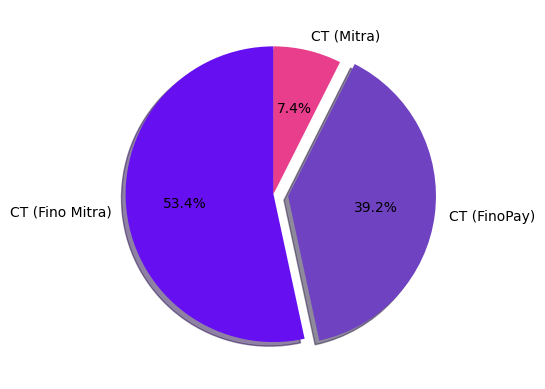

In [51]:
fig, ax = plt.subplots()
explode = (0, 0.1, 0)  
sizes=ct['Platform'].value_counts()
ax.pie(sizes, explode=explode, labels=sizes.index, autopct='%1.1f%%',
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9},colors=company_colors, startangle=90)
plt.show()

In [52]:
ctfp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 11 to 147
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Product                        53 non-null     object        
 1   Date                           53 non-null     datetime64[ns]
 2   Campaign Name                  53 non-null     object        
 3   Target Audience                43 non-null     object        
 4   Sent                           53 non-null     int64         
 5   Engaged (Notification Viewed)  53 non-null     int64         
 6   Rate                           53 non-null     float64       
 7   Status                         53 non-null     object        
 8   Hour                           53 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(4)
memory usage: 3.9+ KB


In [56]:
ctfp[(ctfp['Hour'] > 12) & (ctfp['Hour'] < 16)]



,Product,Date,Campaign Name,Target Audience,Sent,Engaged (Notification Viewed),Rate,Status,Hour
34,Fuel Spends (Insurance),1900-12-11 13:09:00,VR:Fuel_Spends_C16,Customers,366,5,1.370,Completed,13
35,Balance Buildup MAB,1900-12-11 15:25:00,AM:Balance_Buildup,Customers,6399027,235418,3.680,Awaiting Next Run,15
39,Fuel Spends (Insurance),1900-12-12 15:24:00,VR:Fuel_Spends_C16,Customers,369,3,0.810,Completed,15
57,Motor Insurance (Insurance),1900-12-15 13:01:00,SB:Motor_Insurance,Customers,1252116,0,0.000,Running,13
58,Fuel Spends (Insurance),1900-12-15 15:03:00,VR:Fuel_Spends_C16,Customers,373,9,2.410,Completed,15
88,FinoPay OTT,1900-12-21 14:00:00,Step-2_DigiSA__2nd Push,Customers,22152,327,1.480,Awaiting Next Run,14
124,VKYC initiation nudge,1900-12-26 14:16:00,AB1:VKYC_Initiation,Customers,616,94,15.260,Running,14
125,App Install Nudge,1900-12-26 14:52:00,AB1: App_Install,Customers,69640,2806,4.030,Running,14
129,Fuel Spends (Insurance),1900-12-28 14:40:00,VR:Fuel_Spends_C16,Customers,404,4,0.990,Completed,14
132,Motor Insurance*FinoPay,1900-01-24 14:36:00,SB/VR:Motor Insurance_FinoPay_Collab\r\n\r\n,All FinoPay Users,1004919,23874,2.380,Awaiting Next Run,14


In [61]:
import statistics
merchant_data = ctfp[ctfp['Target Audience'] == 'merchant']
statistics.mode(ctfp['Hour'])

10

Merchants are usually messaged at 10am. Whereas the reach peaks at 2-3pm